In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-usage-dataset/mobile_life_sample.csv


In [2]:
df = pd.read_csv("/kaggle/input/mobile-usage-dataset/mobile_life_sample.csv")

In [3]:
# Vamos olhar as primeiras linhas do dataset
df.head()

,User_ID,Date,Screen_Time (mins),Battery_Level (%),Network_Type,Data_Usage (MB),Steps_Count,Call_Duration (mins),App_Usage (Top App)
0,User_1,2024-01-01,455,99,4G,1983.64,4299,17,TikTok
1,User_1,2024-01-02,567,42,WiFi,505.42,5654,5,TikTok
2,User_1,2024-01-03,334,83,4G,1923.93,12354,45,YouTube
3,User_1,2024-01-04,579,93,4G,295.39,13002,52,Spotify
4,User_1,2024-01-05,115,68,WiFi,1170.95,15519,75,Facebook


In [4]:
# Pegamos informações como colunas, tipo de dados em cada coluna e a quantidade de linhas preenchidas em cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               200 non-null    object 
 1   Date                  200 non-null    object 
 2   Screen_Time (mins)    200 non-null    int64  
 3   Battery_Level (%)     200 non-null    int64  
 4   Network_Type          200 non-null    object 
 5   Data_Usage (MB)       200 non-null    float64
 6   Steps_Count           200 non-null    int64  
 7   Call_Duration (mins)  200 non-null    int64  
 8   App_Usage (Top App)   200 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 14.2+ KB


In [5]:
# Somamos as linhas nulas das colunas
df.isnull().sum()

User_ID                 0
Date                    0
Screen_Time (mins)      0
Battery_Level (%)       0
Network_Type            0
Data_Usage (MB)         0
Steps_Count             0
Call_Duration (mins)    0
App_Usage (Top App)     0
dtype: int64

In [6]:
# Vamos obter algumas estatísticas dos dados
df.describe()

,Screen_Time (mins),Battery_Level (%),Data_Usage (MB),Steps_Count,Call_Duration (mins)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,314.980000,53.325000,1033.853800,10714.570000,58.220000
std,175.156211,30.029958,608.628191,5241.048629,34.271479
min,32.000000,5.000000,68.570000,1039.000000,0.000000
25%,160.000000,27.000000,508.450000,7007.500000,26.500000
50%,329.500000,54.000000,1050.370000,11140.500000,57.500000
75%,480.000000,82.000000,1619.402500,15009.500000,87.250000
max,600.000000,100.000000,1998.990000,19850.000000,120.000000


# Analise das frequências dos dados
Vou fazer um gráfico para verificar a frequência de alguns dados, depois vou apresentar as quantidades analisadas por categória

In [7]:
# Estou usando para não precisar fazer as grids nos gráficos ao longo dos códigos
sns.set_style("whitegrid")

# Screen_Time (mins)

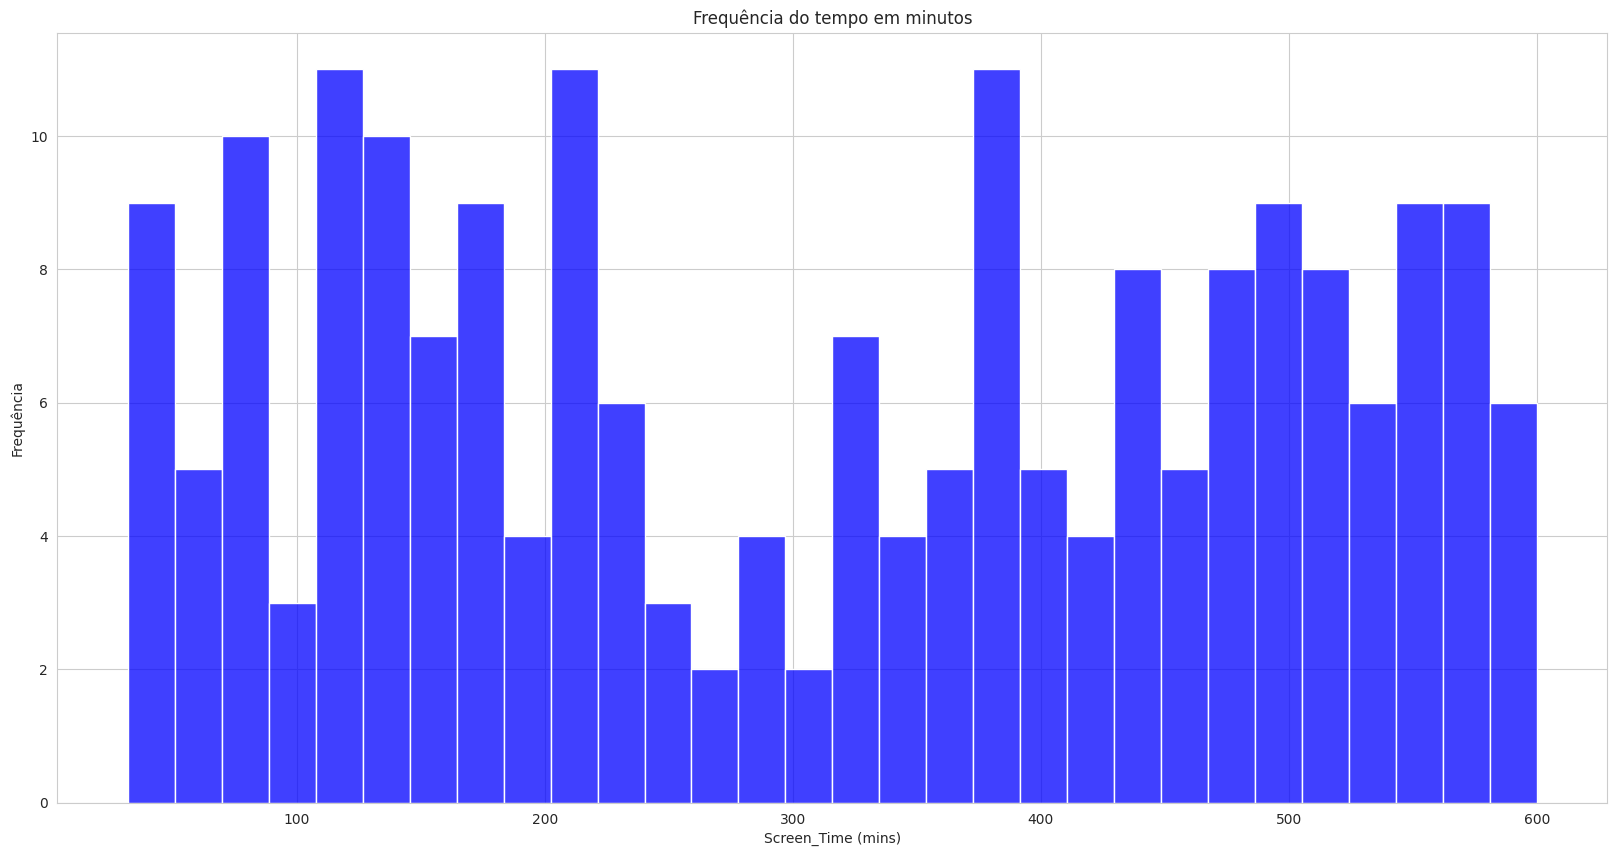

In [8]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Screen_Time (mins)'], bins=30, kde=False, color='blue')
plt.title('Frequência do tempo em minutos')
plt.xlabel("Screen_Time (mins)")
plt.ylabel("Frequência")
plt.show()

In [9]:
qtd = df['Screen_Time (mins)'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Screen_Time (mins)', 'Frequencia']
qtd

,Screen_Time (mins),Frequencia
0,131,5
1,75,3
2,115,3
3,388,3
4,536,2
...,...,...
163,108,1
164,517,1
165,490,1
166,83,1


# Battery_Level (%)

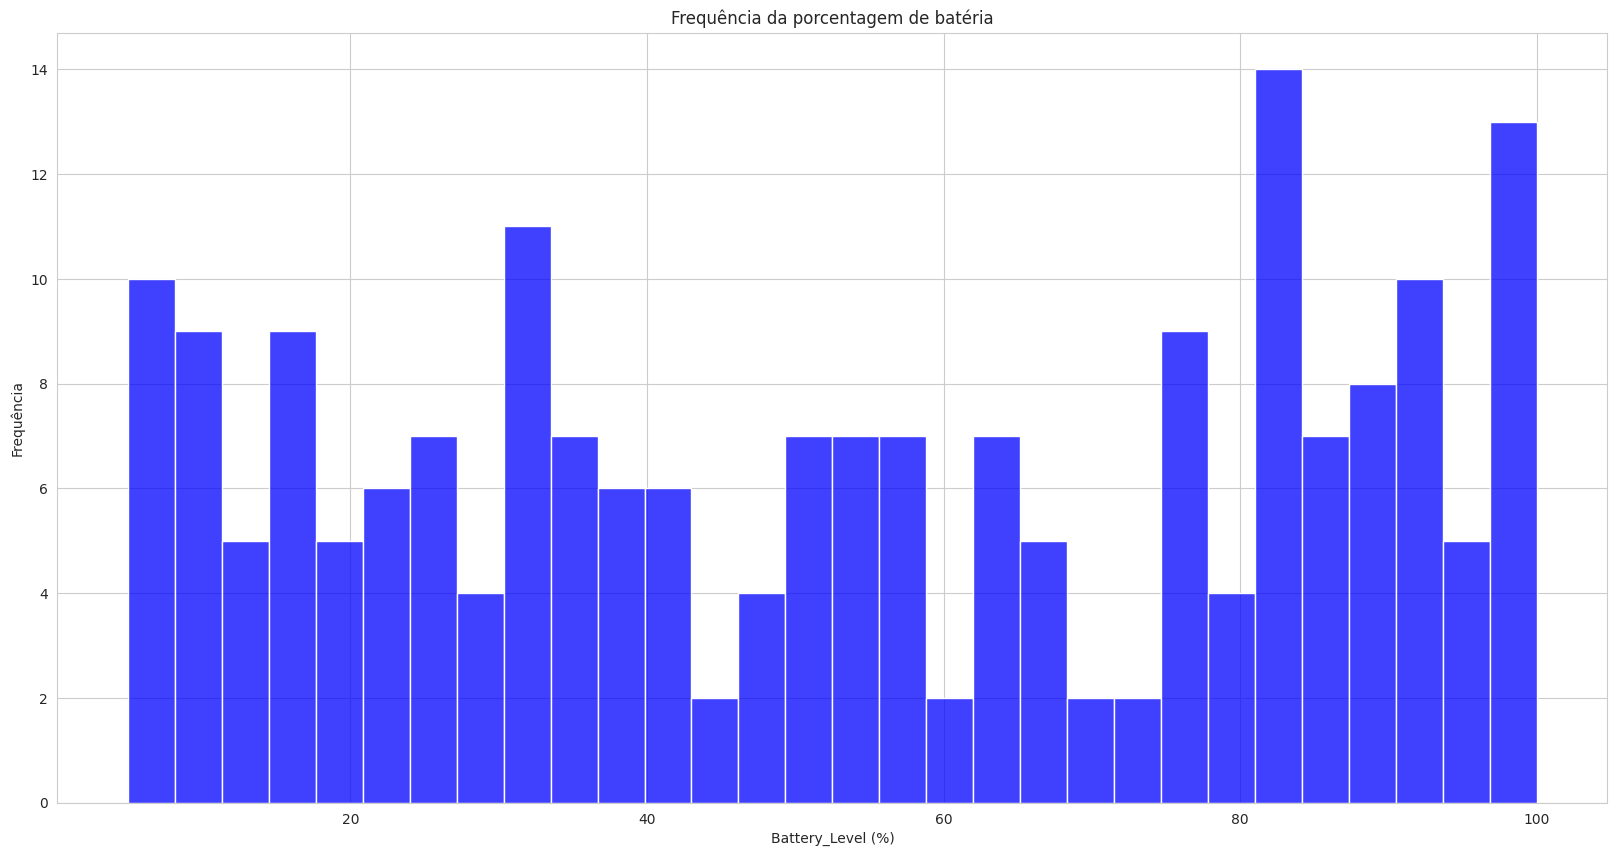

In [10]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Battery_Level (%)'], bins=30, kde=False, color='blue')
plt.title('Frequência da porcentagem de batéria')
plt.xlabel("Battery_Level (%)")
plt.ylabel("Frequência")
plt.show()

In [11]:
qtd = df['Battery_Level (%)'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Battery_Level (%)', 'Frequencia']
qtd

,Battery_Level (%),Frequencia
0,91,6
1,33,6
2,15,6
3,75,6
4,9,5
...,...,...
78,65,1
79,38,1
80,78,1
81,52,1


# Network_Type

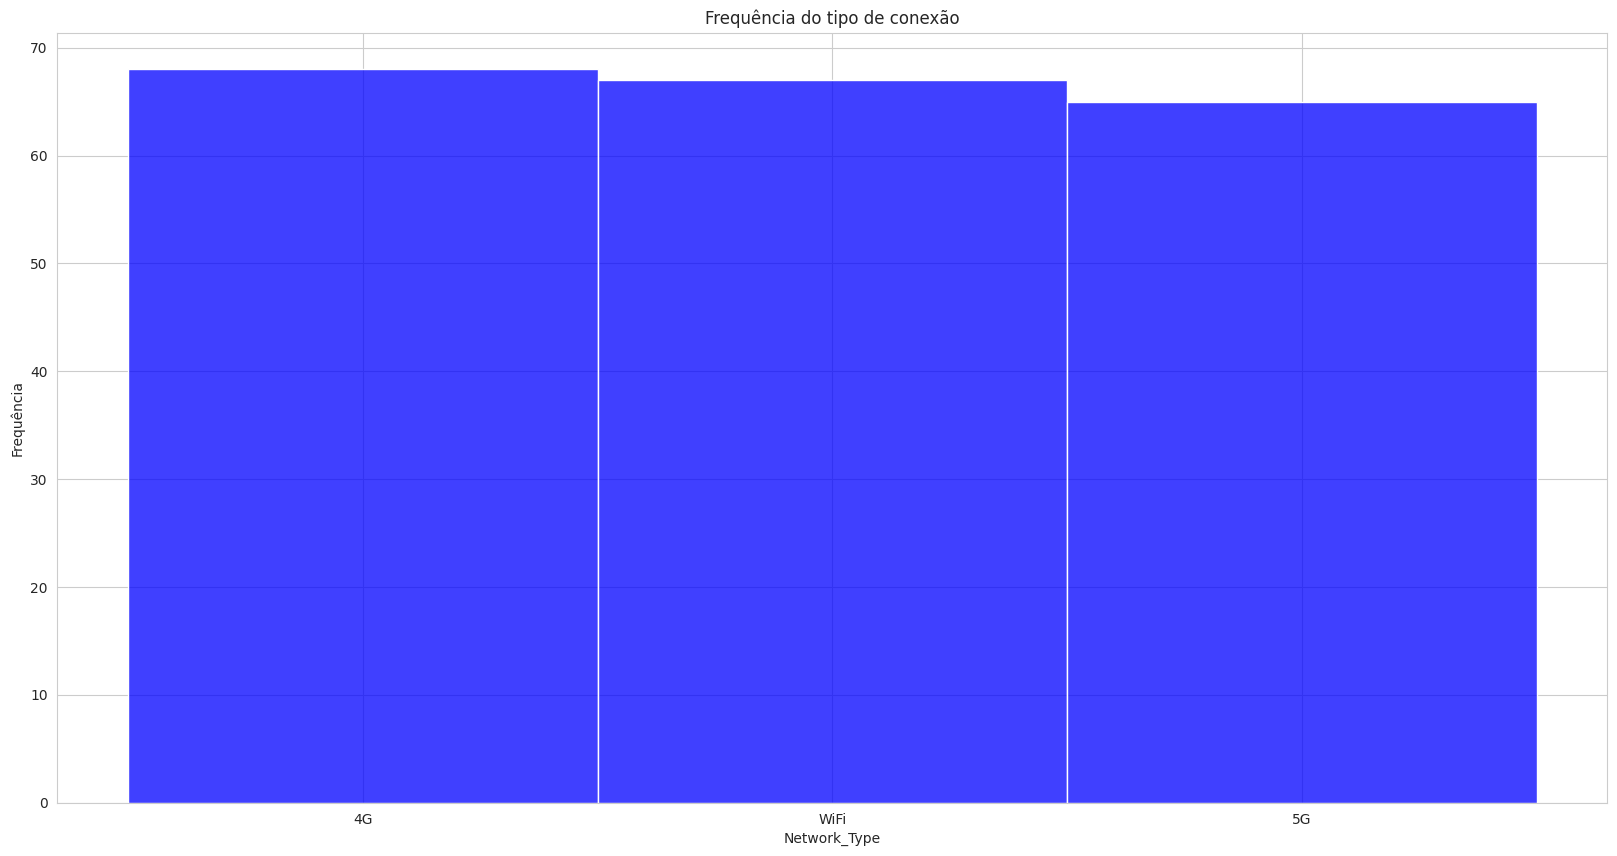

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Network_Type'], bins=30, kde=False, color='blue')
plt.title('Frequência do tipo de conexão')
plt.xlabel("Network_Type")
plt.ylabel("Frequência")
plt.show()

In [13]:
qtd = df['Network_Type'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Network_Type', 'Frequencia']
qtd

,Network_Type,Frequencia
0,4G,68
1,WiFi,67
2,5G,65


# Data_Usage (MB)

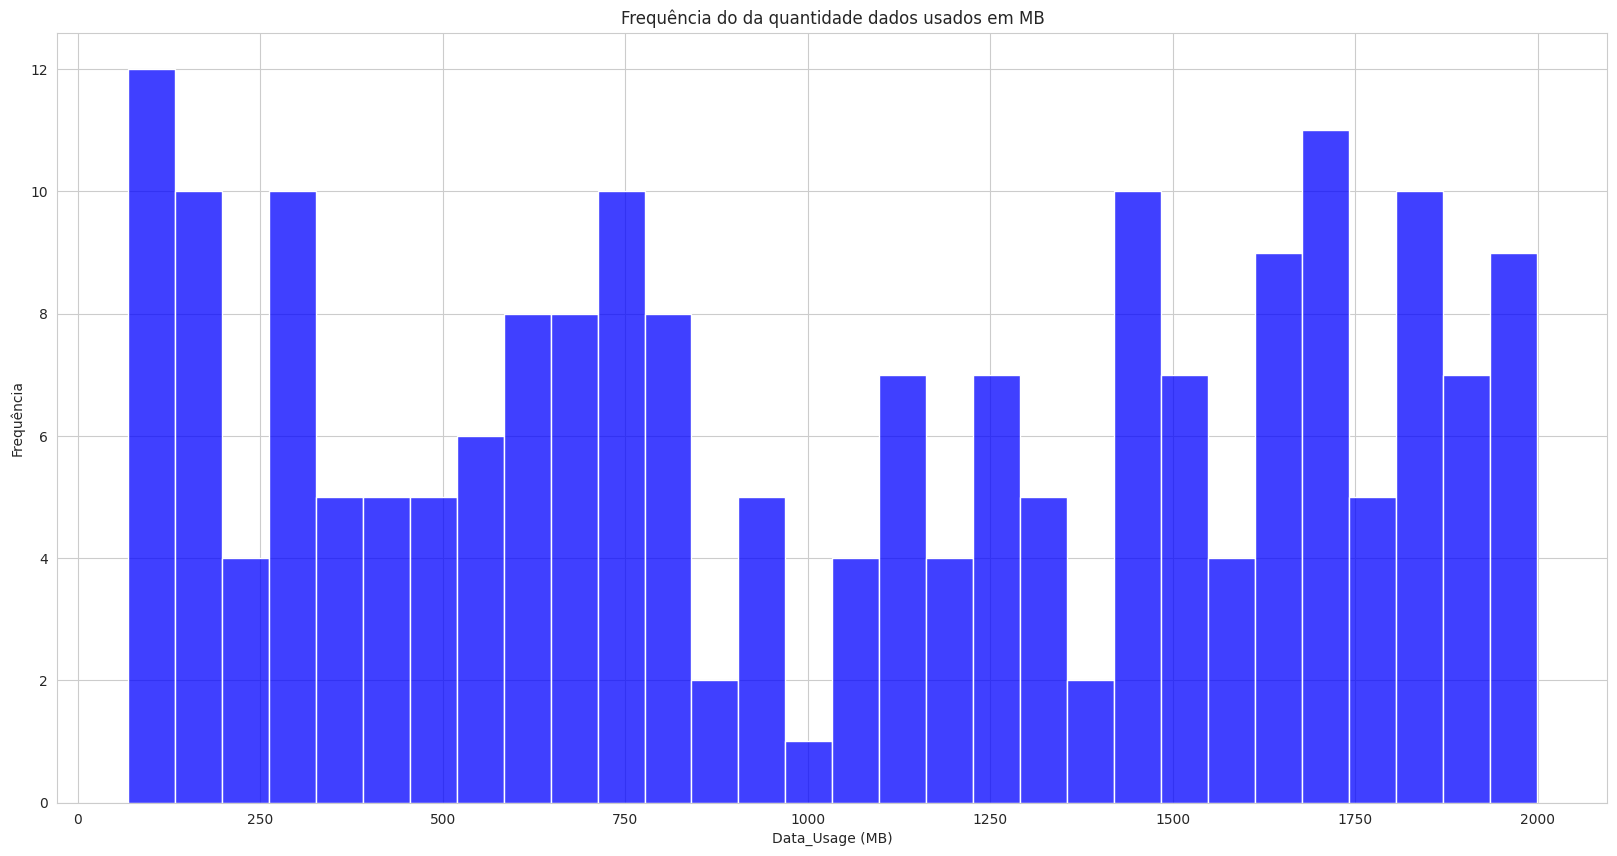

In [14]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Data_Usage (MB)'], bins=30, kde=False, color='blue')
plt.title("Frequência do da quantidade dados usados em MB")
plt.xlabel("Data_Usage (MB)")
plt.ylabel("Frequência")
plt.show()

In [15]:
qtd = df['Data_Usage (MB)'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Data_Usage (MB)', 'Frequencia']
qtd

,Data_Usage (MB),Frequencia
0,1983.64,1
1,1480.20,1
2,1545.12,1
3,757.16,1
4,277.47,1
...,...,...
195,1439.52,1
196,1157.34,1
197,579.27,1
198,140.53,1


# Steps_Count

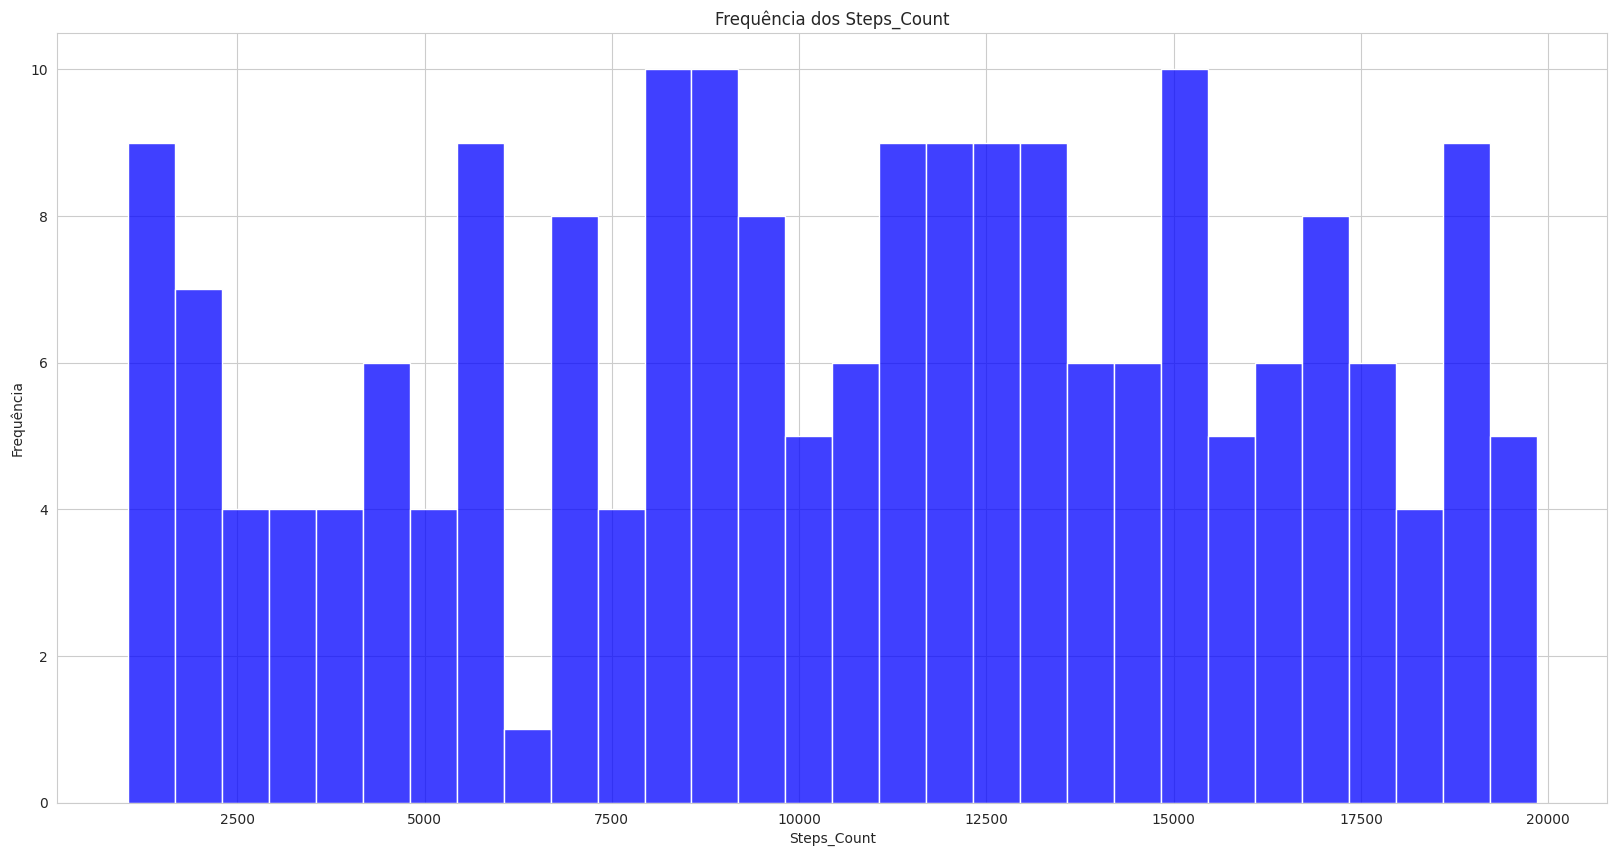

In [16]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Steps_Count'], bins=30, kde=False, color='blue')
plt.title('Frequência dos Steps_Count')
plt.xlabel("Steps_Count")
plt.ylabel("Frequência")
plt.show()

In [17]:
qtd = df['Steps_Count'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Steps_Count', 'Frequencia']
qtd

,Steps_Count,Frequencia
0,4299,1
1,7016,1
2,8023,1
3,10562,1
4,1101,1
...,...,...
195,6019,1
196,8274,1
197,7030,1
198,12287,1


# Call_Duration (mins)

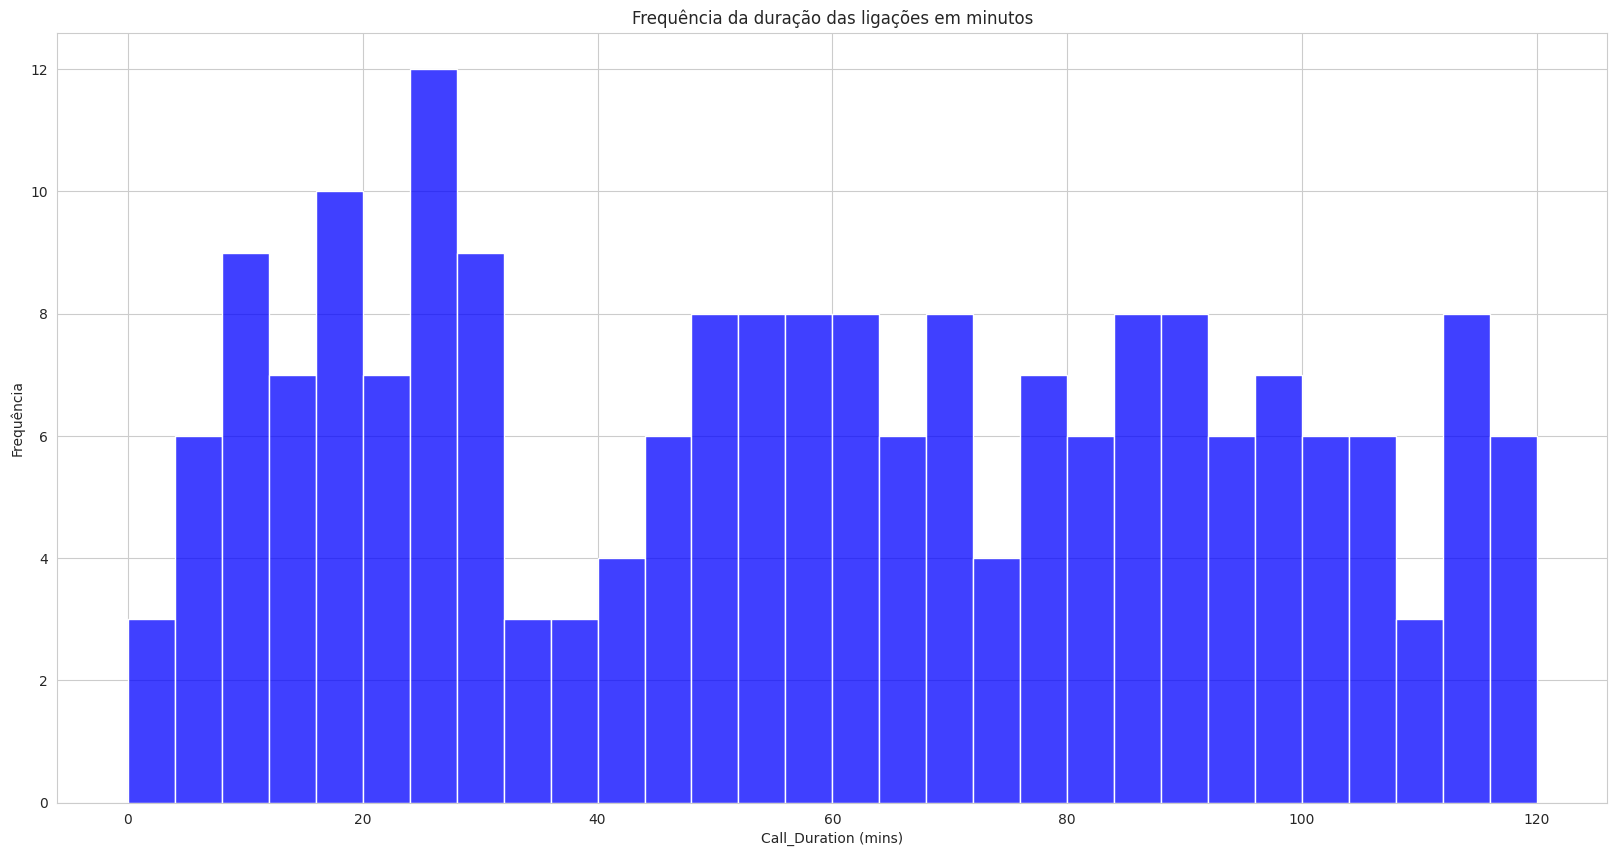

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Call_Duration (mins)'], bins=30, kde=False, color='blue')
plt.title('Frequência da duração das ligações em minutos')
plt.xlabel("Call_Duration (mins)")
plt.ylabel("Frequência")
plt.show()

In [19]:
qtd = df['Call_Duration (mins)'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Call_Duration (mins)', 'Frequencia']
qtd

,Call_Duration (mins),Frequencia
0,17,5
1,25,5
2,50,5
3,31,5
4,27,4
...,...,...
87,35,1
88,42,1
89,81,1
90,75,1


# App_Usage (Top App)

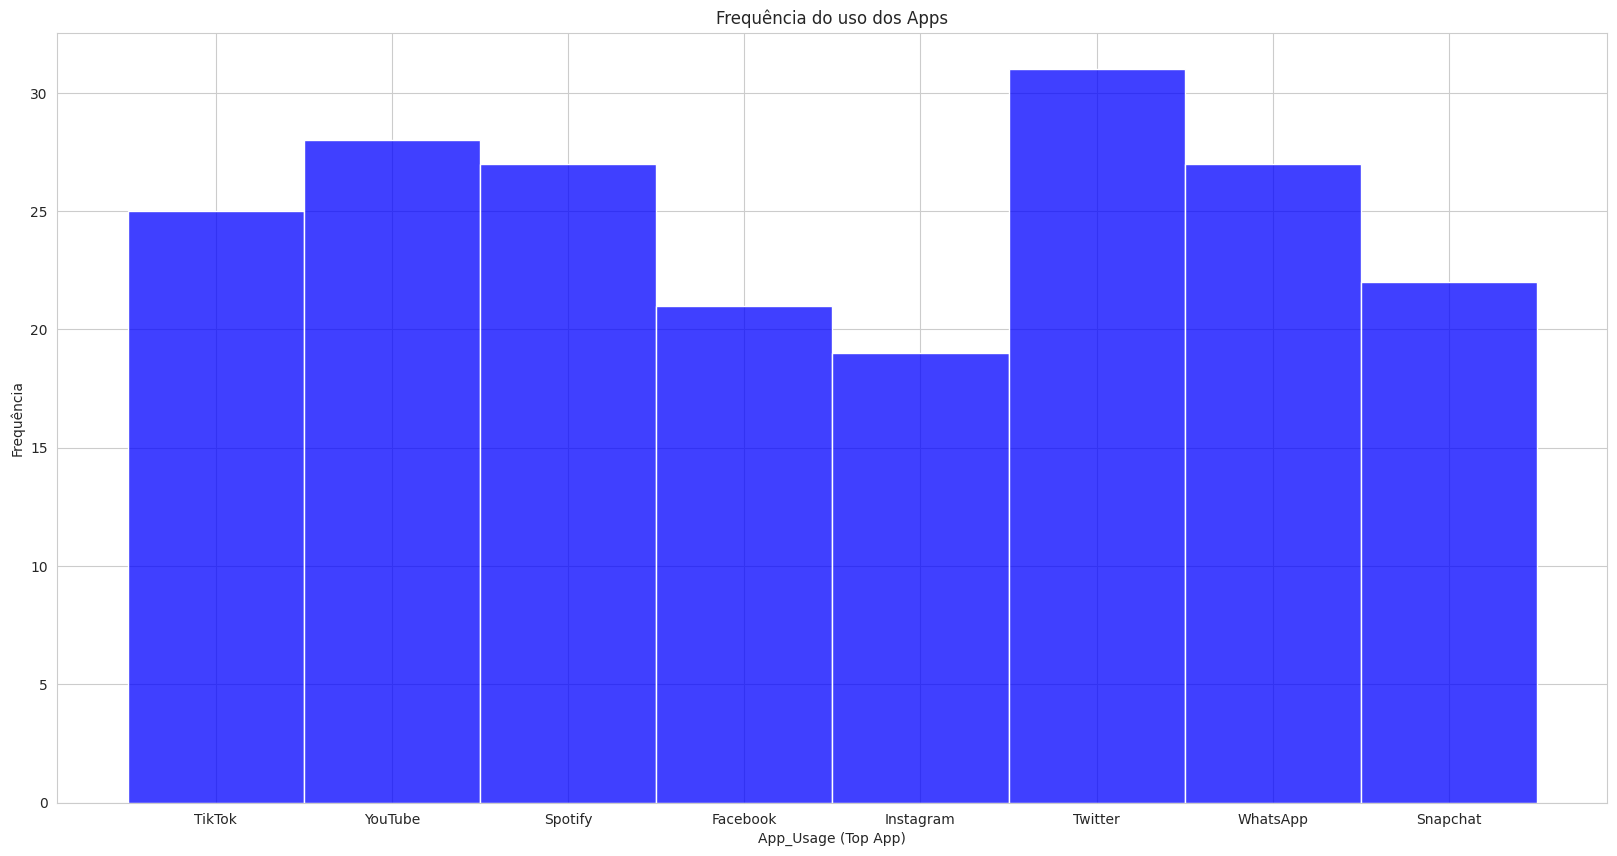

In [20]:
plt.figure(figsize=(20, 10))
sns.histplot(df['App_Usage (Top App)'], bins=30, kde=False, color='blue')
plt.title('Frequência do uso dos Apps')
plt.xlabel("App_Usage (Top App)")
plt.ylabel("Frequência")
plt.show()

In [21]:
qtd = df['App_Usage (Top App)'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['App_Usage (Top App)', 'Frequencia']
qtd

,App_Usage (Top App),Frequencia
0,Twitter,31
1,YouTube,28
2,Spotify,27
3,WhatsApp,27
4,TikTok,25
5,Snapchat,22
6,Facebook,21
7,Instagram,19
